## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIPR

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://rosa.unipr.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Homepage  « Ro.S.A. » 


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['activities.html',
 'themes.html',
 'team.html',
 'project.html',
 'research.html',
 'index.html',
 'http://sea.unipr.it/en',
 'contact.html',
 'FSDA/fsdadownload.html',
 'FSDA/guide.html',
 'fsda_video.html',
 '#',
 None,
 'http://en.unipr.it',
 'poster_FSDA.pdf',
 'fsda.html',
 'https://link.springer.com/article/10.1007/s11222-012-9329-5',
 'http://www.unipr.it/ateneo/organi-e-strutture/centri-e-altre-strutture/centri-universitari/rostabidac',
 'respartners.html']

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res
matchers = ['themes','research','fsda','project']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['research.html',
 'project.html',
 'themes.html',
 'fsda.html',
 'FSDA/fsdadownload.html',
 'fsda_video.html']

In [5]:
string = 'http://rosa.unipr.it/' 
lista_url2 = [string+x for x in lista_url2]
lista_url2

['http://rosa.unipr.it/research.html',
 'http://rosa.unipr.it/project.html',
 'http://rosa.unipr.it/themes.html',
 'http://rosa.unipr.it/fsda.html',
 'http://rosa.unipr.it/FSDA/fsdadownload.html',
 'http://rosa.unipr.it/fsda_video.html']

In [7]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"id":"body_block"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Research « Ro.S.A. »',
 'Projects « Ro.S.A. »',
 'Research topics « Ro.S.A. »',
 ' FSDA Toolbox « Ro.S.A. »',
 ' FSDA Toolbox « Ro.S.A. »',
 ' FSDA Toolbox « Ro.S.A. »']

In [8]:
print(texts[1])



2017






WORKER SAFETY for INAIL
Development of a statistical model to support the assessment of the risk of workers in confined and / or suspicious polluting environments for the National Institute for Labor Insurance and Occupational Diseases (INAIL). The project, through the implementation of a robust statistical model in MATLAB embedded in a website developed by Research Center for Safety and Risk Prevention of Modena and Reggio Emilia University, helps operators to understand, basing on time series, the risk of injury or death associated with performing a particular task in a given environment. This model was used to develop a best practices protocol for workers safety.

Primefish for horizon2020 project
 PrimeFish is an European project which belongs to Horizon 2020 programme. The overall objective of PrimeFish is to enhance the economic sustainability of European fisheries and aquaculture sectors. In PrimeFish an innovative decision support framework was developed, containin

### TEXT CLEANING

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

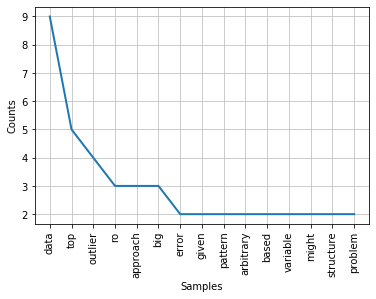

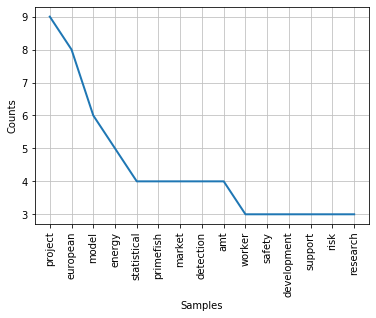

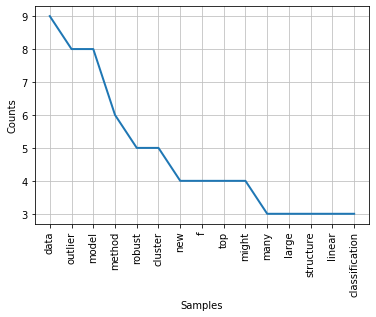

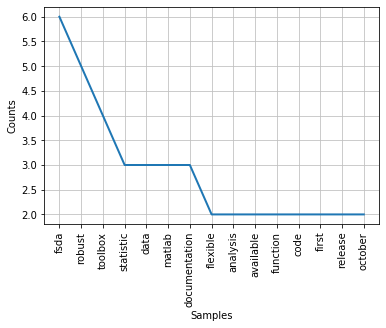

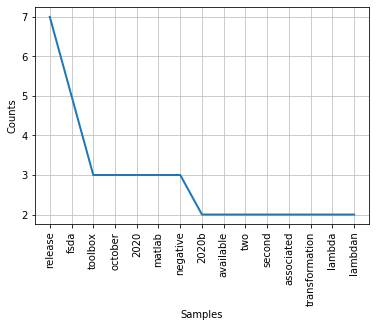

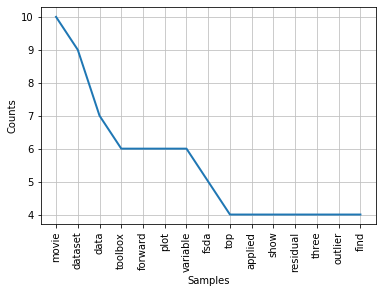

In [11]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

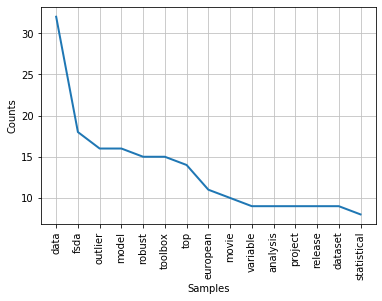

In [12]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

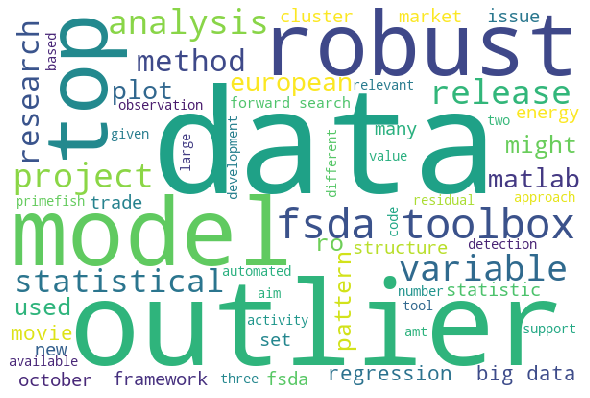

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [14]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [15]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'data': 6.172},
 {'everywhere': 11.172},
 {'ibm': 11.172},
 {'estimate': 11.172},
 {'several': 11.172},
 {'million': 11.172},
 {'gigabyte': 11.172},
 {'created': 10.172},
 {'every': 11.172},
 {'year': 9.5871},
 {'yearly': 11.172},
 {'average': 11.172},
 {'growth': 11.172},
 {'50': 10.172},
 {'ro': 8.5871},
 {'committed': 11.172},
 {'propose': 11.172},
 {'tool': 9.172},
 {'challenge': 11.172},
 {'top': 7.3647},
 {'outlier': 7.172},
 {'error': 10.172},
 {'handling': 11.172},
 {'simply': 11.172},
 {'imply': 11.172},
 {'trash': 11.172},
 {'bin': 11.172},
 {'must': 11.172},
 {'managed': 11.172},
 {'care': 11.172},
 {'put': 11.172},
 {'inconsistent': 11.172},
 {'value': 9.172},
 {'compatible': 11.172},
 {'given': 9.172},
 {'set': 8.8501},
 {'hypnotises': 11.172},
 {'present': 9.5871},
 {'influence': 11.172},
 {'performance': 11.172},
 {'highlighted': 11.172},
 {'longer': 11.172},
 {'relevant': 9.172},
 {'pattern': 8.5871},
 {'standard': 10.172},
 {'outdated': 11.172},
 {'approach': 9.172},

In [16]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'data': 6.172},
 {'fsda': 7.0021},
 {'outlier': 7.172},
 {'model': 7.172},
 {'outlier': 7.172},
 {'model': 7.172},
 {'robust': 7.2652},
 {'toolbox': 7.2652},
 {'robust': 7.2652},
 {'toolbox': 7.2652},
 {'top': 7.3647},
 {'european': 7.7126},
 {'movie': 7.8501},
 {'variable': 8.0021},
 {'analysis': 8.0021},
 {'project': 8.0021},
 {'release': 8.0021},
 {'dataset': 8.0021},
 {'variable': 8.0021},
 {'analysis': 8.0021},
 {'project': 8.0021},
 {'release': 8.0021},
 {'dataset': 8.0021},
 {'variable': 8.0021},
 {'analysis': 8.0021},
 {'project': 8.0021},
 {'release': 8.0021},
 {'dataset': 8.0021},
 {'variable': 8.0021},
 {'analysis': 8.0021},
 {'project': 8.0021},
 {'release': 8.0021},
 {'dataset': 8.0021},
 {'variable': 8.0021},
 {'analysis': 8.0021},
 {'project': 8.0021},
 {'release': 8.0021},
 {'dataset': 8.0021},
 {'statistical': 8.172},
 {'forward': 8.172},
 {'statistical': 8.172},
 {'forward': 8.172},
 {'method': 8.3647},
 {'research': 8.3647},
 {'matlab': 8.3647},
 {'plot': 8.3647},
